In [1]:
import os, sys
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

utils_path = os.path.join(this_path, '../../../../code/utils')
if utils_path not in sys.path:
    sys.path.append(utils_path)

from emc_operations import *




In [2]:
h5_file = os.path.join(this_path, '0.h5')
hf = h5py.File(h5_file)

In [3]:
df = pd.DataFrame()
for key in ['momentum', 'theta', 'phi']:
    df[key] = hf[key][:]

hit_imgs = hf['hit_img'][:]
df['etot'] = hit_imgs.sum(axis=(1,2))
df['hit_num'] = (hit_imgs>1e-4).sum(axis=(1,2))

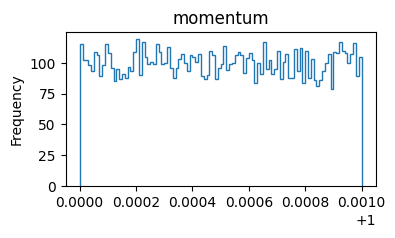

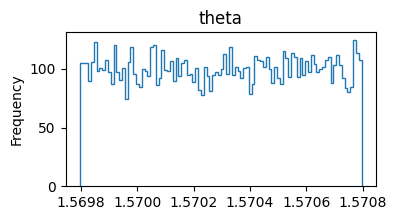

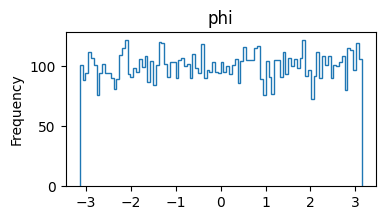

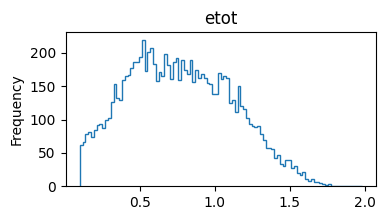

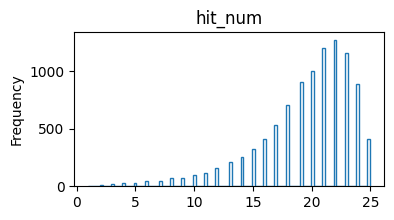

In [4]:
for key in df.columns:
    df[key].plot.hist(figsize=(4,2), bins=100, histtype='step', title=key)
    plt.show()

<AxesSubplot:xlabel='etot', ylabel='hit_num'>

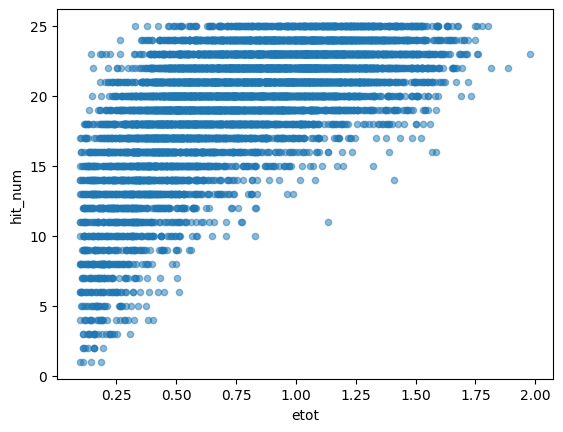

In [5]:
# 查看击中数和总能量的依赖关系
df.plot.scatter('etot', 'hit_num', alpha=0.5)


<Figure size 640x480 with 0 Axes>

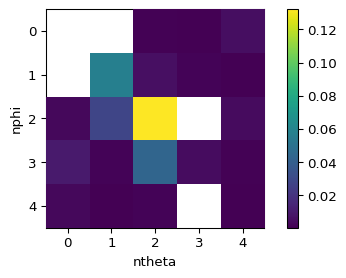

<Figure size 640x480 with 0 Axes>

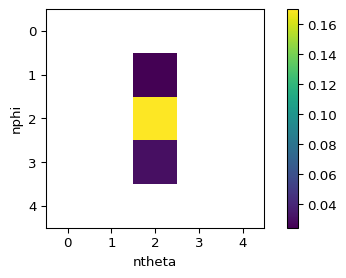

<Figure size 640x480 with 0 Axes>

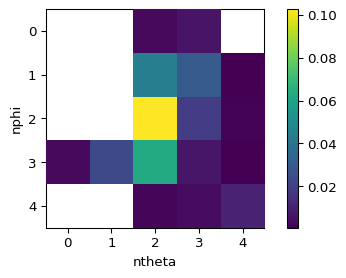

<Figure size 640x480 with 0 Axes>

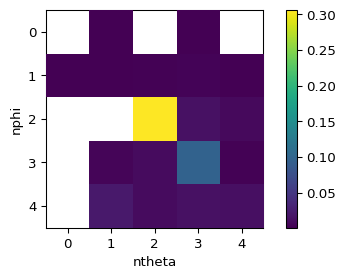

<Figure size 640x480 with 0 Axes>

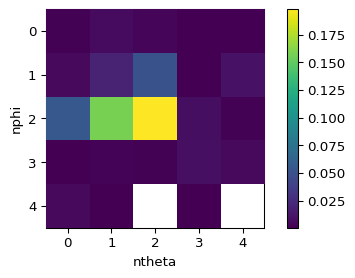

In [6]:
n = 5
for i in range(n):
    fig = showHitImg(hit_imgs[i], figsize=(5,3))
    plt.show()